<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/MNISTLOSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 48 kB 4.9 MB/s 
     |████████████████████████████████| 189 kB 44.0 MB/s 
     |████████████████████████████████| 1.2 MB 44.2 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 51 kB 210 kB/s 
     |████████████████████████████████| 558 kB 35.0 MB/s 
     |████████████████████████████████| 130 kB 49.2 MB/s 


In [2]:
import fastbook


In [3]:
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
from fastbook import *

In [5]:
from fastai.vision.all import *

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
path = untar_data(URLs.MNIST_SAMPLE)

In [9]:
threes = (path/'train'/'3').ls()

In [10]:
sevens = (path/'train'/'7').ls()

In [11]:
Image_threes = Image.open(threes[0])

In [12]:
Image_threes

In [13]:
Image_sevens = Image.open(sevens[0])

In [14]:
Image_sevens

In [15]:
threes_tensors = [tensor(Image.open(o))for o in(threes)]




In [16]:
im3_t = threes_tensors[0]

In [17]:
im3_t

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  34, 116, 143, 255, 253, 210, 133,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  15,  67, 170, 252, 252, 252, 253, 252, 252, 252, 1

In [18]:
df = pd.DataFrame(im3_t[4:10, 4:22])

In [19]:
sevens_tensors = [tensor(Image.open(o)) for o in sevens]

In [20]:
im7_t = sevens_tensors[0]

In [21]:
im7_t

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

In [22]:
df = pd.DataFrame(im7_t[10:20,7:27])

In [23]:
#We color code our tensor images
df.style.set_properties(**{'font - size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,234,252,253,252,252,252,252,196,195,195,195,195,253,252,252,84,0,0,0,0
1,252,252,225,223,114,84,84,0,0,0,0,16,253,252,214,28,0,0,0,0
2,157,112,0,0,0,0,0,0,0,0,16,203,253,252,118,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,26,207,253,255,168,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,104,252,252,215,33,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,67,240,252,220,31,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,29,181,252,217,37,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,253,252,252,84,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,76,191,255,215,110,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,19,196,252,253,121,0,0,0,0,0,0,0,0,0,0,0


In [24]:
import torchvision

In [25]:
#Here we turn the tensors into a stack and turn them into floating point numbers between 0  and 1  through calling the .float()method and dividing by 255
sevens_stack = torch.stack(sevens_tensors).float() /255

In [26]:
threes_stack = torch.stack(threes_tensors).float() /255

In [27]:
sevens_stack[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0

In [28]:
valid_3_tens = torch.stack(threes_tensors).float() /255

In [29]:
valid_7_tens = torch.stack(sevens_tensors).float() /255

In [30]:
#Data processing with pytorch we take the data and turn the shape without changing the contents of the data
train_x = torch.cat([threes_stack, sevens_stack]).view(-1,28*28) 

In [31]:
#We label each image
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)

In [32]:
dset = list(zip(train_x, train_y))

In [33]:
#Processing the validation data
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28 * 28 )

In [34]:
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)

In [35]:
validDset = list(zip(valid_x,valid_y))

In [ ]:
dset[0]


In [37]:
#We then randomly initialize our weights from random numbers to start training at a point
#Otherwise if we don't our model will give us constant values which won't affect backpropagation hence the model won't learn
def init_params(size,std=1.0):
  return (torch.randn(size)*std).requires_grad_()


In [38]:
weights = init_params((28*28,1))

In [ ]:
weights

In [40]:
bias = init_params(1)

In [41]:
#In neural networks the equation y =wx + b the y is the predicted value the w are weights and the b are the parameters
#while the x are the input values
#Both the weights are bias make up the parameters

In [42]:
#Prediction for one image with the following calculation:
(train_x[0] * weights.T).sum() + bias

tensor([-10.2998], grad_fn=<AddBackward0>)

We could use Python for loops to calculate the prediction for each image but that turns out to be very slow as python does not use GPU  and Python is very slow when it comes to loops in general. For convinience there is a mathematical operation that enables us to calculate the dot product of the weights and input/pixel values from images. This mathematical operation is called matrix multiplication which does this through multiplying the row of the weight matrix by the column of the input images.

In [43]:
#Function to calculate the matrix multiplication in python using the @ operator
def linear1(xb):return xb@weights + bias

In this function we take the input features which are the pixel values from our image and turn it into a 1 dimensional array which is called a vector and then do a batch matrix multiplication by the weights of the layer. The equation
is batch@weights + bias

In [44]:
#We calculate a 
prediction1 = linear1(train_x)

In [45]:
prediction1

tensor([[-10.2998],
        [  2.7059],
        [ -8.8174],
        ...,
        [-10.8699],
        [-15.2660],
        [-13.3496]], grad_fn=<AddBackward0>)

In [46]:
#1 was labeled as a  3 
correct_three = (prediction1>0.0).float() == train_y 

In [47]:
correct_three_accuracy = (prediction1>0.0).float().mean()

In [48]:
correct_three_accuracy

tensor(0.1297)

We need gradients in order to improve our model using SGD stochastic gradient descent to get the gradients we need a loss functions. 


Gradients are a measure of how the loss function changes with small tweaks to the weights 


The purpose of a loss function is to measure the difference between the predicted values and the true values to see how much the function: y=wx+b changed when the input changed i.e the gradient in this case our weights

In [49]:
targets = tensor([1,0,1])

In [50]:
predictions = tensor([0.2, 0.4, 0.9])

In [51]:
def mnist_loss(targets, predictions):
  return torch.where(targets == 1, 1-predictions, predictions).mean()

In [52]:
loss_fn = mnist_loss(targets,predictions)

In [53]:
loss_fn

tensor(0.4333)

A scalar is one number a vector is a one dimensional matrix that has only one row and one column a matrix is a two dimensional array of numbers that contains n rows and n columns. In pytorch a lower number is associated with a better loss since we need only one value for from our loss function and we obtain this through adding the mean() method.

A sigmoid function is a mathematical operation or a function that takes in an input value and outputs a value in between a zero and a one

In [54]:
#This is how we define a sigmoid function:
def sigmoid(x): return (1/1+torch.exp(-x))

In [55]:
import numpy as np


/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


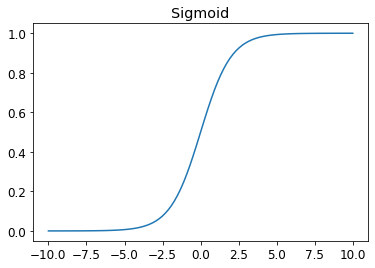

In [56]:
#Here we plot the function on a graph to visualize it

plot_function(torch.sigmoid, title="Sigmoid", min =-10, max =10 )

In [57]:
#We redefine our loss function to apply sigmoid function to our predicted values,this ensures that our loss function takes in values that
#are in between zero and one 
def mnist_loss(targets, predictions):
  predictions = predictions.sigmoid()
  return (torch.where(targets == 1, 1 - predictions, predictions)).mean()

We defined a loss function to ensure that gradient descent/ automated learning can be smoothly applied to our model.
The loss enables us to see how far our machine learning model is from the desired goal. You can think of the loss a perfomance evaluation technique during training. The metric is used to drive human understanding while the loss function is used to enable our model to learn effectively through application of gradient descent and so on.

The next step after obtaining the loss is to change and update the weights based on the loss, this is known as taking an optimization step:(i.e , taking an optimization step is changing and updating the weights based on the loss). To take an optimization step we have to calculate the loss of a single or more data items. Calculating the loss for the whole dataset would relatively take a long time and calculating the loss for a single data item wouldn't give much and precise information thus will lead to unstable gradients. The walk around for this is to calculate the average loss for a few data items at a time,this is called a mini-batch. The batch size is the number of data items in a mini batch.



In [60]:
coll = range(15)
dl = DataLoader(coll, batch_size =5, shuffle = True)

In [67]:
dl = list(dl)

In [68]:
dl

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [ ]:
doc(list)

The independent variables are the inputs while the dependent variables are the targets.

In pytorch a dataset is a collection that contains independent and dependent variables. (x,y) x is the training inputs y is the labeled data.

In [73]:
ds = L(enumerate(string.ascii_lowercase))

In [74]:
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [75]:
dl = DataLoader(ds, batch_size=5, shuffle = True)

In [76]:
dl

In [77]:
list(dl)

[(tensor([17, 18, 10, 22,  8]), ('r', 's', 'k', 'w', 'i')),
 (tensor([14, 20, 15,  9, 13]), ('o', 'u', 'p', 'j', 'n')),
 (tensor([21, 12,  7, 25,  6]), ('v', 'm', 'h', 'z', 'g')),
 (tensor([ 5, 11, 23,  1,  3]), ('f', 'l', 'x', 'b', 'd')),
 (tensor([ 0, 24, 19, 16,  2]), ('a', 'y', 't', 'q', 'c')),
 (tensor([4]), ('e',))]

In [78]:
dataloader_list  = list(dl)

In [79]:
dataloader_list

[(tensor([14, 19, 24,  3,  8]), ('o', 't', 'y', 'd', 'i')),
 (tensor([ 2, 12, 16, 13,  5]), ('c', 'm', 'q', 'n', 'f')),
 (tensor([ 9, 15, 22, 17, 21]), ('j', 'p', 'w', 'r', 'v')),
 (tensor([ 0,  1, 23, 25, 18]), ('a', 'b', 'x', 'z', 's')),
 (tensor([ 7, 10,  4, 11,  6]), ('h', 'k', 'e', 'l', 'g')),
 (tensor([20]), ('u',))]

In [ ]:
for x,y in dl:
  pred = model(x) #We pass in our input data into the models 
  loss = loss_fn(pred,y) #We calculate the loss based on the predictions and the target variables loss = (y - ^Y )2 pred = ^y, y target variable
  loss.backward() #We do backpropagation after calculating the loss
  parameters -= parameters.grad * lr #We update the parameters by taking the difference of the stepsize( i.e learning rate * the gradient descent) a
  


Usually we start by initializing the parameters to random values to allow gradient descent to take place effectively. We do random initialization because if we don't our layers will give constant/same outputs and hence hindering gradient descent from taking place effectively.

In [82]:
weights = init_params((28 * 28 , 1))#We initialise the weights randomly through the init_params method

In [87]:
dl = DataLoader(dset, batch_size=256) #We load the dataset to a batch size of 256

In [91]:
xb ,yb = first(dl) #We then split the dataset into training and labeled data

In [92]:
xb.shape

torch.Size([256, 784])

In [58]:




plot_function




<function fastbook.plot_function>